In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#  add the CSV file
sal = pd.read_csv("Salaries.csv")

### 1:Basic Data Exploration

In [10]:
dataset_info = pd.DataFrame({
    'Information': ['Number of Rows', '  Number of Columns'],
    'Count': [len(sal), len(sal.columns)]
})
print("Dataset Information:")
dataset_info





Dataset Information:


,Information,Count
0,Number of Rows,148654
1,Number of Columns,13


In [11]:
data_info = pd.DataFrame({
    'Data Type': sal.dtypes,
    'Missing Values': sal.isnull().sum() > 0,
    'Number of Missing Values': sal.isnull().sum()
})

dataset_info
data_info


,Data Type,Missing Values,Number of Missing Values
Id,int64,False,0
EmployeeName,object,False,0
JobTitle,object,False,0
BasePay,float64,True,609
OvertimePay,float64,True,4
OtherPay,float64,True,4
Benefits,float64,True,36163
TotalPay,float64,False,0
TotalPayBenefits,float64,False,0
Year,int64,False,0


### 2: Descriptive Statistics

In [12]:
salary_columns = ['BasePay', 'OvertimePay', 'OtherPay', 'TotalPay', 'TotalPayBenefits']
statistics = pd.DataFrame({
    'Mean': sal[salary_columns].mean(),
    'Median': sal[salary_columns].median(),
    'Mode': sal[salary_columns].mode().iloc[0],
    'Minimum': sal[salary_columns].min(),
    'Maximum': sal[salary_columns].max(),
    'Range': sal[salary_columns].max() - sal[salary_columns].min(),
    'Standard Deviation': sal[salary_columns].std()
})
statistics


,Mean,Median,Mode,Minimum,Maximum,Range,Standard Deviation
BasePay,66325.448840,65007.45,0.00,-166.01,319275.01,319441.02,42764.635495
OvertimePay,5066.059886,0.00,0.00,-0.01,245131.88,245131.89,11454.380559
OtherPay,3648.767297,811.27,0.00,-7058.59,400184.25,407242.84,8056.601866
TotalPay,74768.321972,71426.61,0.00,-618.13,567595.43,568213.56,50517.005274
TotalPayBenefits,93692.554811,92404.09,7959.18,-618.13,567595.43,568213.56,62793.533483


### 3: Data Cleaning

In [13]:
# Fill missing values using mean for numerical columns
numerical_columns = ['BasePay', 'Benefits', 'OtherPay', 'OvertimePay']
sal[numerical_columns] = sal[numerical_columns].fillna(sal[numerical_columns].mean())

# Drop 'Notes' and 'Status' columns
sal.drop(columns=['Notes', 'Status'], axis=1, inplace=True)

### 4:Basic Data Visualization

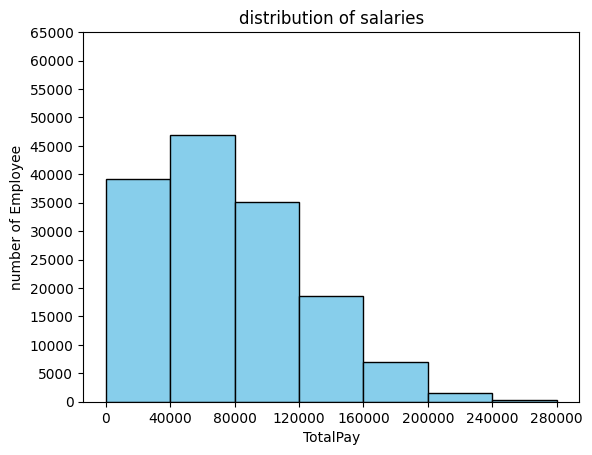

<Figure size 900x400 with 0 Axes>

In [14]:
xt=np.arange(0,300000,40000)
yt=np.arange(0,70000,5000)
plt.hist(sal.TotalPay,bins=xt,color='skyblue', edgecolor='black')

plt.title('distribution of salaries')
plt.xticks(xt)
plt.yticks(yt)
plt.xlabel("TotalPay")
plt.ylabel("number of Employee")
plt.figure(figsize=(9,4))
plt.show()

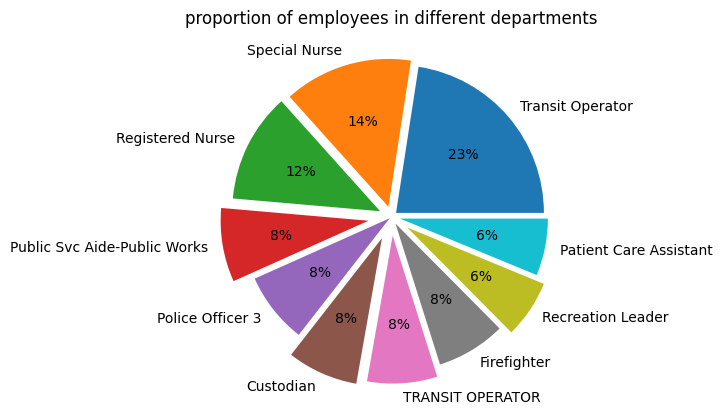

<Figure size 900x300 with 0 Axes>

In [15]:
job_title_counts = sal['JobTitle'].value_counts(ascending=False)
top_n = 10
plt.pie(job_title_counts.head(top_n),labels=job_title_counts.head(top_n).index,autopct='%1.0f%%',explode=(np.random.rand(top_n)/6))

plt.title('proportion of employees in different departments')
plt.figure(figsize=(9,3))
plt.show()


### 5:Grouped Analysis

In [16]:
# Group data by Year and JobTitle, and calculate the mean of 'TotalPayBenefits'
grouped_data =sal.groupby(['Year','JobTitle'])['TotalPayBenefits'].mean()
grouped_data_info = pd.DataFrame(grouped_data)
grouped_data_info.reset_index(inplace=True)
counter=4
started_Year=2011
selected_rows = []

# Iterate through the grouped data and select rows based on the counter
for i ,j in enumerate(grouped_data_info['Year']):
    if j==started_Year and counter!=0:
        counter-=1
        selected_rows.append(grouped_data_info.loc[i])
    elif j != started_Year:
        started_Year=j
        counter=4


data_samples=pd.DataFrame(selected_rows)
data_samples.reset_index(inplace=True)
data_samples.drop(columns=['index'])


,Year,JobTitle,TotalPayBenefits
0,2011,ACCOUNT CLERK,44035.664337
1,2011,ACCOUNTANT,47429.268000
2,2011,ACCOUNTANT INTERN,29031.742917
3,2011,ACUPUNCTURIST,67594.400000
4,2012,ASR-Office Assistant,59793.245455
5,2012,Account Clerk,69012.928824
6,2012,Accountant I,97296.566667
7,2012,Accountant II,92333.582083
8,2013,ASR-Office Assistant,55417.380000
9,2013,Account Clerk,64175.402222


Correlation coefficient between 'TotalPayBenefits' and 'BasePay': 0.9429986849707098 



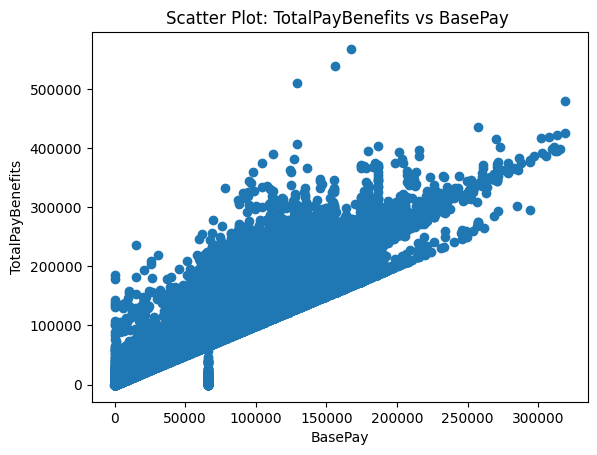

In [17]:
correlation_coefficient=sal['TotalPayBenefits'].corr( sal['BasePay'])
print(f"Correlation coefficient between 'TotalPayBenefits' and 'BasePay': {correlation_coefficient} \n")


plt.scatter(sal['BasePay'], sal['TotalPayBenefits'])
plt.title('Scatter Plot: TotalPayBenefits vs BasePay ')
plt.xlabel('BasePay')
plt.ylabel('TotalPayBenefits')
plt.show()


### 5: Summary of Insights


### Brief Analysis Report:

1. **Workforce Overview:**
   - The dataset covers 148,000 employees.

2. **TotalPay Distribution:**
   - Majority of employees, especially in common job titles, receive a TotalPay around $100,000.

3. **Dominant Job Titles:**
   - "Transit Operator" and "Special Nurse" are the most prevalent job titles.

4. **Correlation Analysis:**
   - Strong correlation observed between "BasePay" and "TotalPayBenefits," indicating a consistent relationship.


